In [52]:
import torch

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from torch import nn, optim
import torch.nn.functional as F


In [53]:
df = pd.read_csv('largeTrain.csv')           #opening dataset
df_test=pd.read_csv('largeValidation.csv')

In [54]:
X_train = df.iloc[:, 1:]
y_train = df.iloc[:, 0]           #extracting from dataset 
X_test = df_test.iloc[:, 1:]
y_test=df_test.iloc[:, 0]


In [55]:
X_train=np.asarray(X_train)
y_train=np.asarray(y_train)
X_test=np.asarray(X_test)          
y_test=np.asarray(y_test)   #converting to numpy



In [56]:
X_train = torch.from_numpy(X_train).float()
y_train = torch.squeeze(torch.from_numpy(y_train).long())
X_test = torch.from_numpy(X_test).float()
y_test = torch.squeeze(torch.from_numpy(y_test).long())         #converting to torch from numpy


print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

torch.Size([8999, 128]) torch.Size([8999])
torch.Size([999, 128]) torch.Size([999])


In [57]:
class Net(nn.Module):
  def __init__(self, n_features,hidden_units):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(n_features, hidden_units)
    self.fc2 = nn.Linear(hidden_units, 10)
  def forward(self, x):                                       #creating neural network class
    x = F.relu(self.fc1(x))  
    return torch.softmax(self.fc2(x),dim=1)

In [58]:
criterian=nn.CrossEntropyLoss()       #using cross etropy loss

In [59]:
  batch_size=100
  XX=torch.split(X_train,batch_size)
  yy=torch.split(y_train,batch_size)      #splitting according to batch size

In [60]:
def cost_hidden(hidden,lr):

  net = Net(X_train.shape[1],hidden)
  optimizer = optim.Adam(net.parameters(), lr=0.01)
  train_cost=[]
  test_cost=[]
  for epoch in range(100):
    
    for batch in range(len(XX)):        #fiiting out model
        optimizer.zero_grad()
        y_pred = net(XX[batch])
        
        train_loss =criterian(y_pred,yy[batch])
        train_loss.backward()
        optimizer.step()

  
  y_pred = net(X_train)


  train_loss =criterian(y_pred,y_train)
  train_cost.append(train_loss.item())             #loss of train and test data

  ytest_pred=net(X_test)

  test_loss =criterian(ytest_pred,y_test)
  test_cost.append(test_loss.item())
  return [train_cost[0],test_cost[0]]



In [61]:
Train_COST=[]
Test_COST=[]
c1=cost_hidden(5,0.01)
c2=cost_hidden(20,0.01)
c3=cost_hidden(50,0.01)
c4=cost_hidden(100,0.01)
c5=cost_hidden(200,0.01)

Train_COST.append(c1[0])
Train_COST.append(c2[0])
Train_COST.append(c3[0])                        #cost for 5 different hidden units
Train_COST.append(c4[0])
Train_COST.append(c5[0])

Test_COST.append(c1[1])
Test_COST.append(c2[1])
Test_COST.append(c3[1])
Test_COST.append(c4[1])
Test_COST.append(c5[1])

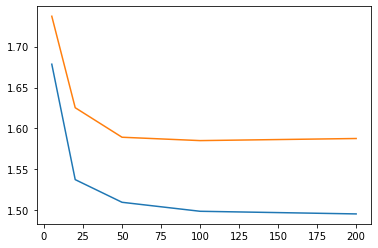

In [62]:
plt.plot([5,20,50,100,200],Train_COST)
plt.plot([5,20,50,100,200],Test_COST)         
plt.show()

In [63]:
def cost_hidden(hidden,lr):

  net = Net(X_train.shape[1],hidden)
  optimizer = optim.Adam(net.parameters(), lr=0.01)
  train_cost=[]
  test_cost=[]
  for epoch in range(100):
                                            #fiiting out model for different learning rates
    for batch in range(len(XX)):
        optimizer.zero_grad()
        y_pred = net(XX[batch])                
        
        train_loss =criterian(y_pred,yy[batch])
        train_loss.backward()
        optimizer.step()

  
    y_pred = net(X_train)
  

    train_loss =criterian(y_pred,y_train)
    train_cost.append(train_loss.item())

    ytest_pred=net(X_test)               #loss of train and test data

    test_loss =criterian(ytest_pred,y_test)
    test_cost.append(test_loss.item())
  return train_cost,test_cost


In [64]:

train_cost,test_cost=cost_hidden(4,0.1)         #plots of cost vs epochs at different learning rates       



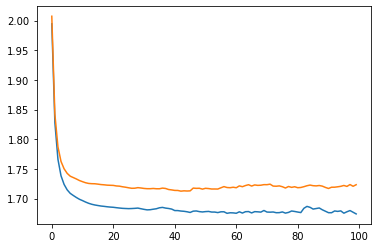

In [65]:
plt.plot(train_cost)
plt.plot(test_cost)
plt.show()

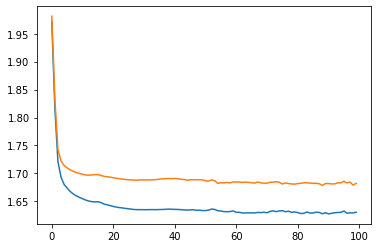

In [66]:
train_cost,test_cost=cost_hidden(4,0.01)
plt.plot(train_cost)
plt.plot(test_cost)
plt.show()                                 

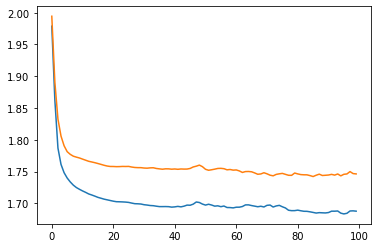

In [67]:
train_cost,test_cost=cost_hidden(4,0.001)
plt.plot(train_cost)
plt.plot(test_cost)
plt.show()